In [6]:
import os 
import pandas as pd 
from matplotlib import pyplot as plt 

In [90]:
def plot_line_plot(df, column_name, figsize=(14, 4), dpi=100):
    plt.figure(figsize=figsize, dpi=dpi)
    plt.plot(df[column_name], '-', linewidth=1)
    plt.xlabel('Index')
    plt.ylabel(column_name)
    plt.title(f'Line Plot of {column_name}')
    
    min_value = df[column_name].min()
    max_value = df[column_name].max()
    
    plt.axhline(y=min_value, color='black', linestyle=':', linewidth=1)
    plt.axhline(y=max_value, color='black', linestyle=':', linewidth=1)
    
    plt.text(x=df.index.max(), y=min_value+0.07, s=f'Min: {min_value:.2f}', fontsize=8, color='black', ha='right', va='center')
    plt.text(x=df.index.max(), y=max_value-0.07, s=f'Max: {max_value:.2f}', fontsize=8, color='black', ha='right', va='center')
    plt.show()


def plot_bar_chart(filename, line_number, figsize=(14, 6), dpi=80):
    
    column_names = [[    "bestEDPconfig",    "normalized EDP of bestEDPconfig",    "normalized ED^2P of bestEDPconfig",    "absolute EDP of bestEDPconfig",    "absolute ED^2P of bestEDPconfig",    "absolute EDP of Bench 0 on bestEDPconfig",    "normalized EDP of Bench 0 on bestEDPconfig",    "absolute EDP of Bench 1 on bestEDPconfig",    "normalized EDP of Bench 1 on bestEDPconfig",    "absolute EDP of Bench 2 on bestEDPconfig",    "normalized EDP of Bench 2 on bestEDPconfig",    "absolute EDP of Bench 3 on bestEDPconfig",    "normalized EDP of Bench 3 on bestEDPconfig",    "absolute EDP of Bench 4 on bestEDPconfig",    "normalized EDP of Bench 4 on bestEDPconfig"],[    "bestPerfWeightedConfig",    "normalized EDP of bestPerfWeightedConfig",    "normalized ED^2P of bestPerfWeightedConfig",    "absolute EDP of bestPerfWeightedConfig",    "absolute ED^2P of bestPerfWeightedConfig",    "absolute ED^2P of Bench 0 on bestPerfWeightedConfig",    "normalized ED^2P of Bench 0 on bestPerfWeightedConfig",    "absolute ED^2P of Bench 1 on bestPerfWeightedConfig",    "normalized ED^2P of Bench 1 on bestPerfWeightedConfig",    "absolute ED^2P of Bench 2 on bestPerfWeightedConfig",    "normalized ED^2P of Bench 2 on bestPerfWeightedConfig",    "absolute ED^2P of Bench 3 on bestPerfWeightedConfig",    "normalized ED^2P of Bench 3 on bestPerfWeightedConfig",    "absolute ED^2P of Bench 4 on bestPerfWeightedConfig",    "normalized ED^2P of Bench 4 on bestPerfWeightedConfig"]]
    column_to_plot = [[    "normalized EDP of bestEDPconfig",    "normalized EDP of Bench 0 on bestEDPconfig",    "normalized EDP of Bench 1 on bestEDPconfig",    "normalized EDP of Bench 2 on bestEDPconfig",    "normalized EDP of Bench 3 on bestEDPconfig",    "normalized EDP of Bench 4 on bestEDPconfig"],[    "normalized ED^2P of bestPerfWeightedConfig",    "normalized ED^2P of Bench 0 on bestPerfWeightedConfig",    "normalized ED^2P of Bench 1 on bestPerfWeightedConfig",    "normalized ED^2P of Bench 2 on bestPerfWeightedConfig",    "normalized ED^2P of Bench 3 on bestPerfWeightedConfig",    "normalized ED^2P of Bench 4 on bestPerfWeightedConfig"]]
    

    df = pd.read_csv(filename, header=None)
    df = df.drop(df.columns[-1], axis=1)

    df.columns = column_names[line_number]
    row = df.iloc[line_number]
    row = row[column_to_plot[line_number]]
    
    plt.figure(figsize=figsize, dpi=dpi)
    plt.bar(['GMean','Benchmark-1','Benchmark-2','Benchmark-3','Benchmark-4','Benchmark-5'], row.values)
    plt.xlabel('Column Name')
    plt.ylabel('Value')
    plt.title(f'Bar Chart of Row {line_number}')
    plt.show()
    

In [4]:
source_location = 'logs/logs'
files = ['EfficiencyOptimized-minEDP.best', 'PerformanceOptimized-minED2P.best', 'PerformanceOptimized-minED2P.log', 'EfficiencyOptimized-minEDP.log']

In [10]:
column_names = ["normalized EDP", "normalized ED^2P", "absolute EDP", "absolute ED^2P"]
perf_log = pd.read_csv(os.path.join(source_location, 'PerformanceOptimized-minED2P.log'), names=column_names, header=None)
eff_log = pd.read_csv(os.path.join(source_location, 'EfficiencyOptimized-minEDP.log'), names=column_names, header=None)

,normalized EDP,normalized ED^2P,absolute EDP,absolute ED^2P
0,1.000000,1.000000,6.652090e-10,1.730050e-14
1,0.857171,0.713171,5.701970e-10,1.233830e-14
2,0.682798,0.534388,4.542030e-10,9.245200e-15
3,0.655660,0.505332,4.361500e-10,8.742510e-15
4,0.655660,0.505332,4.361500e-10,8.742510e-15
...,...,...,...,...
996,0.486522,0.299684,3.236390e-10,5.184690e-15
997,0.486522,0.299684,3.236390e-10,5.184690e-15
998,0.486522,0.299684,3.236390e-10,5.184690e-15
999,0.486522,0.299684,3.236390e-10,5.184690e-15


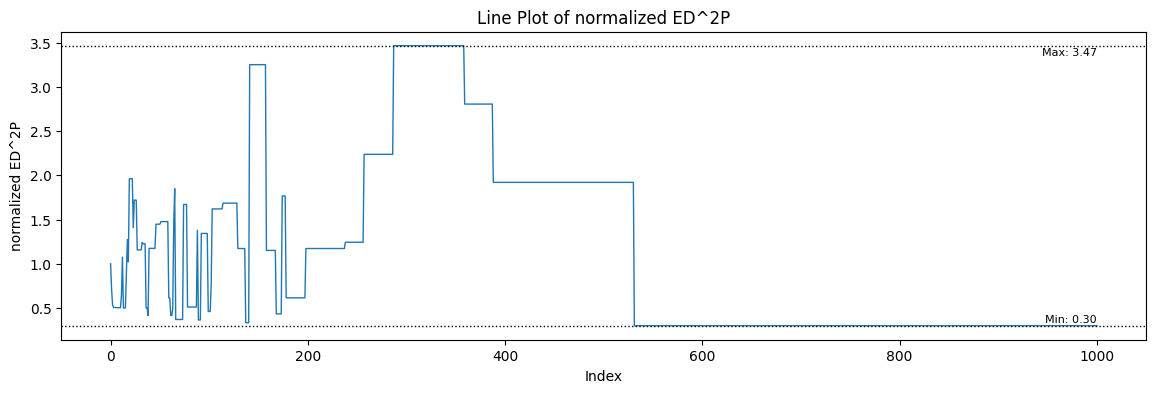

In [38]:
plot_line_plot(perf_log, 'normalized ED^2P')

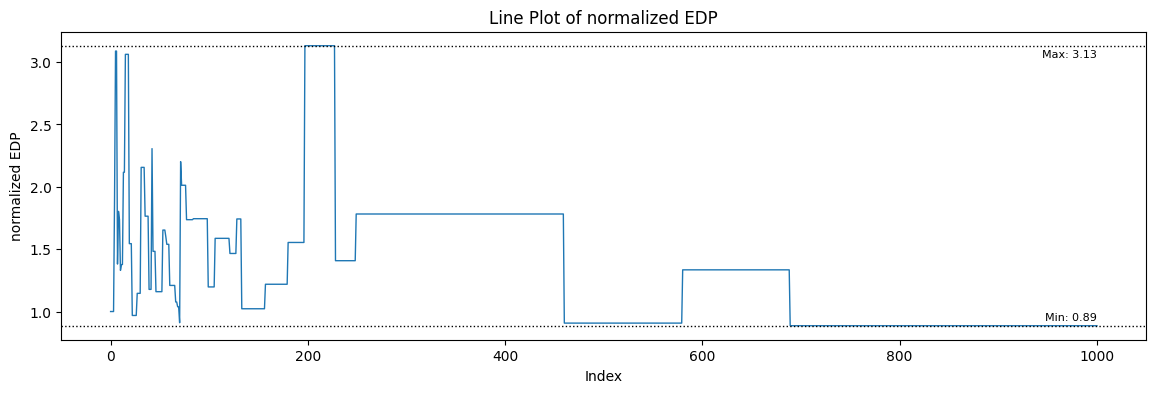

In [39]:
plot_line_plot(eff_log, 'normalized EDP')

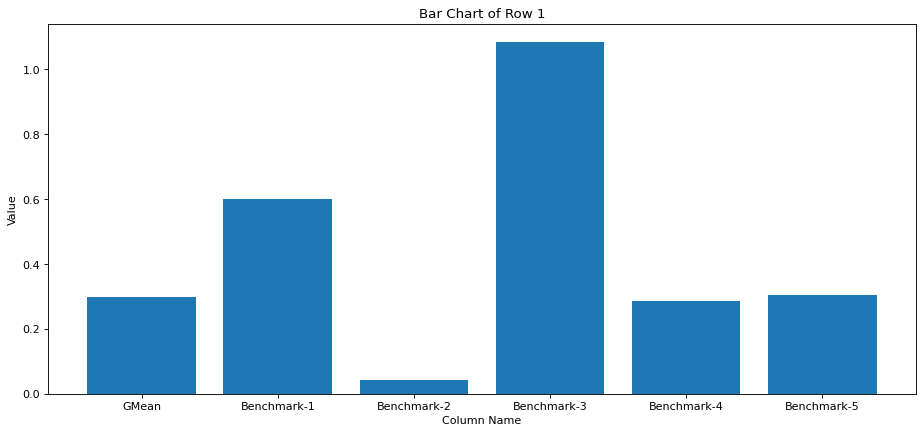

In [91]:
plot_bar_chart(os.path.join(source_location,'PerformanceOptimized-minED2P.best'),1)

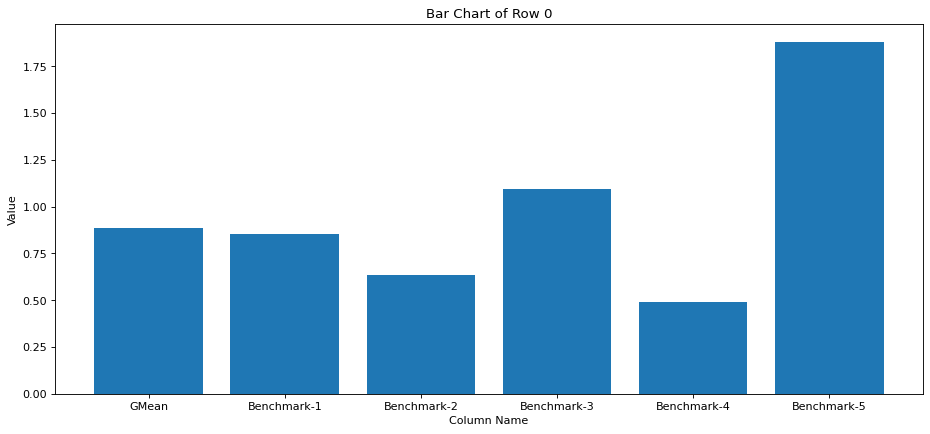

In [92]:
plot_bar_chart(os.path.join(source_location,'EfficiencyOptimized-minEDP.best'),0)